# Setup

In [1]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

No of images in training set: 835
No of images in validation set: 104
No of images in test set: 105
No of images in feeder set: 15079
Labels: ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
Labels (feeder): ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']


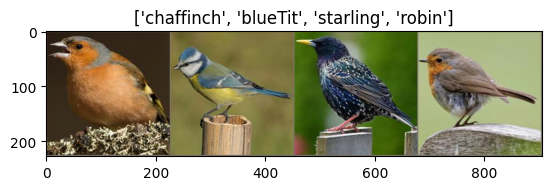

In [2]:
%run setup.ipynb 

# Training with augmentation

Now we've trained our model and assessed its performance on the feeder data... it's not the worst, but let's see if we can't make it a bit stronger by adding augmentations.

## Augmentation round 1

First, just gonna mess up the pictures a little - no sciency arguments for it other than intuitively trying to capture that the feeder images are more grainy and the birds are not always perfectly posed (hence the crop).

In [3]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=8, shuffle=True, num_workers=4)

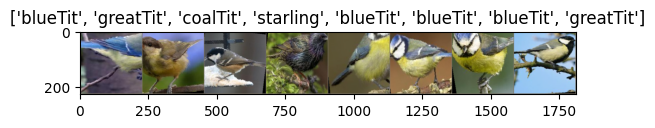

In [4]:
# looking at the augmentations..
inputs, classes = next(iter(dataloader_train_aug1))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_labels[x] for x in classes])

Load in a fresh ResNet50 that's prepped for transfer learning

In [5]:
# load "clean" resnet50
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug1) # FIXME does this change?

### Training
First with the frozen layers, then unfreeze for finetuning

In [6]:
freezetrained_model_aug1, _ = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

Epoch 1/24
----------
Train Loss: 1.8152 Acc: 0.4168
Val Loss: 1.6403 Acc: 0.7115
Epoch time 1m 33s
----------

Epoch 2/24
----------
Train Loss: 1.4983 Acc: 0.7210
Val Loss: 1.4202 Acc: 0.8077
Epoch time 1m 30s
----------

Epoch 3/24
----------
Train Loss: 1.2818 Acc: 0.7916
Val Loss: 1.1969 Acc: 0.8750
Epoch time 1m 29s
----------

Epoch 4/24
----------
Train Loss: 1.1590 Acc: 0.7784
Val Loss: 1.0225 Acc: 0.8654
Epoch time 1m 29s
----------

Epoch 5/24
----------
Train Loss: 1.0405 Acc: 0.8060
Val Loss: 0.9663 Acc: 0.8654
Epoch time 1m 32s
----------

Epoch 6/24
----------
Train Loss: 0.9482 Acc: 0.8132
Val Loss: 0.8565 Acc: 0.8750
Epoch time 1m 31s
----------

Epoch 7/24
----------
Train Loss: 0.8813 Acc: 0.8299
Val Loss: 0.7996 Acc: 0.8942
Epoch time 1m 31s
----------

Epoch 8/24
----------
Train Loss: 0.8263 Acc: 0.8551
Val Loss: 0.7648 Acc: 0.9038
Epoch time 1m 31s
----------

Epoch 9/24
----------
Train Loss: 0.8180 Acc: 0.8299
Val Loss: 0.8218 Acc: 0.8750
Epoch time 1m 31s
----

In [7]:
unfreeze_layers(freezetrained_model_aug1)
model_aug1, model_aug1_info = train_model(model=freezetrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

Epoch 1/24
----------
Train Loss: 0.3916 Acc: 0.8910
Val Loss: 0.1463 Acc: 0.9808
Epoch time 2m 45s
----------

Epoch 2/24
----------
Train Loss: 0.2567 Acc: 0.9293
Val Loss: 0.1158 Acc: 0.9904
Epoch time 2m 45s
----------

Epoch 3/24
----------
Train Loss: 0.2063 Acc: 0.9389
Val Loss: 0.1170 Acc: 0.9808
Epoch time 2m 44s
----------

Epoch 4/24
----------
Train Loss: 0.1843 Acc: 0.9425
Val Loss: 0.0881 Acc: 0.9904
Epoch time 2m 46s
----------

Epoch 5/24
----------
Train Loss: 0.1561 Acc: 0.9449
Val Loss: 0.0816 Acc: 0.9808
Epoch time 2m 45s
----------

Epoch 6/24
----------
Train Loss: 0.1584 Acc: 0.9437
Val Loss: 0.0565 Acc: 0.9808
Epoch time 2m 46s
----------

Epoch 7/24
----------
Train Loss: 0.1261 Acc: 0.9605
Val Loss: 0.0558 Acc: 0.9808
Epoch time 2m 46s
----------

Epoch 8/24
----------
Train Loss: 0.1319 Acc: 0.9629
Val Loss: 0.0381 Acc: 0.9904
Epoch time 2m 46s
----------

Epoch 9/24
----------
Train Loss: 0.1201 Acc: 0.9665
Val Loss: 0.0335 Acc: 0.9904
Epoch time 2m 46s
----

### Round 1 results

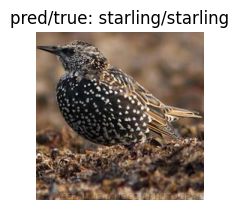

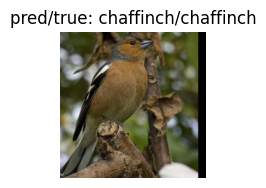

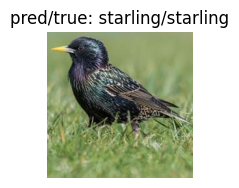

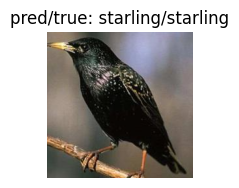

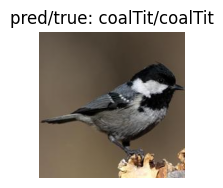

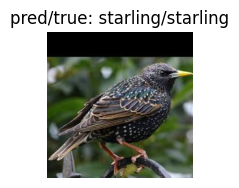

In [8]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

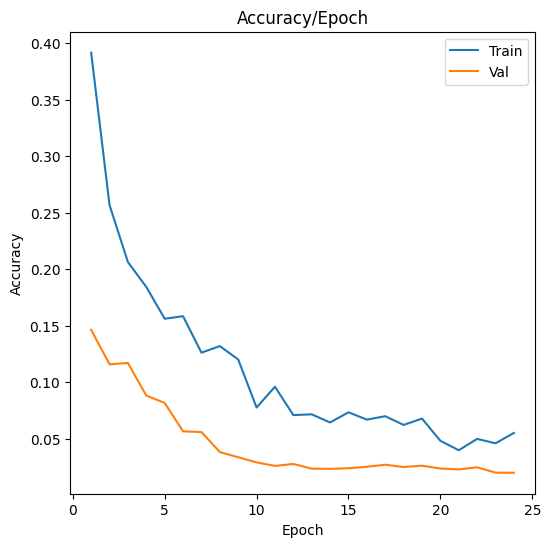

In [9]:
plot_accuracies(model_aug1_info["train_loss"], model_aug1_info["val_loss"], ["Train", "Val"])

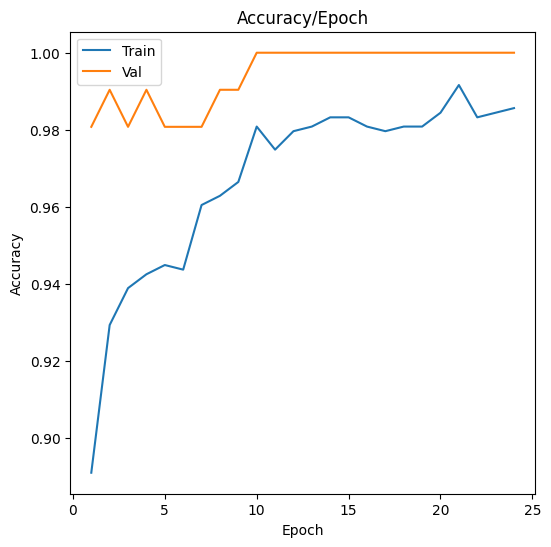

In [10]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 14  0  1  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  1  0 14  0  0]
 [ 0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 97.14285714285714


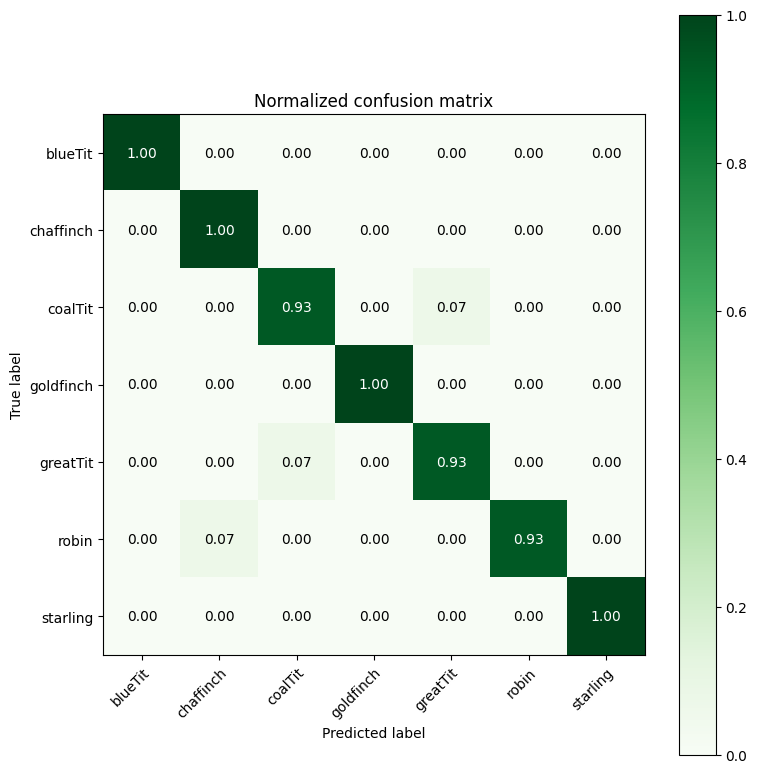

In [11]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


In [12]:
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       0.94      1.00      0.97        15
     coalTit       0.93      0.93      0.93        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       0.93      0.93      0.93        15
       robin       1.00      0.93      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



### On feeder

[[ 329   45    0   17 1510   49  128]
 [   2 2498    7   53  274  397  321]
 [   1   92  726  125  598  162  142]
 [   0   49    0 1922   24    4    1]
 [   3   15   16    8 1895   20   76]
 [   3   43    0    8   57  957  360]
 [   1   39    0   16   26  184 1876]]
Accuracy 67.6636381722926


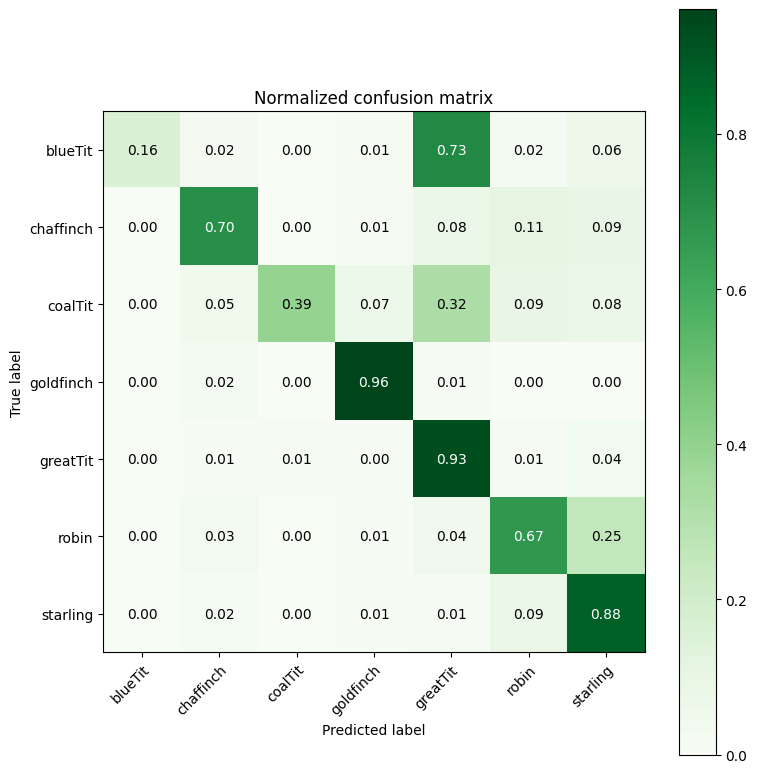

In [13]:
truel, predl = makeAll(dataloader_feeder, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


## Augmentation Round 2

Add blur and colorjitter

In [14]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1), # Added
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug2 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation2)
dataloader_train_aug2 = torch.utils.data.DataLoader(dataset_train_aug2, batch_size=8, shuffle=True, num_workers=4)

Load in a fresh ResNet50 that's prepped for transfer learning

In [15]:
# load "clean" resnet50
untrained_model_aug2 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug2) 


### Training
First with the frozen layers, then unfreeze for finetuning

In [16]:
freezetrained_model_aug2, _ = train_model(model=untrained_model_aug2, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug2) 

Epoch 1/24
----------
Train Loss: 1.8458 Acc: 0.3377
Val Loss: 1.7912 Acc: 0.4327
Epoch time 1m 32s
----------

Epoch 2/24
----------
Train Loss: 1.5875 Acc: 0.6012
Val Loss: 1.6540 Acc: 0.5577
Epoch time 1m 32s
----------

Epoch 3/24
----------
Train Loss: 1.4152 Acc: 0.6431
Val Loss: 1.5606 Acc: 0.5000
Epoch time 1m 31s
----------

Epoch 4/24
----------
Train Loss: 1.2928 Acc: 0.7126
Val Loss: 1.4959 Acc: 0.5192
Epoch time 1m 31s
----------

Epoch 5/24
----------
Train Loss: 1.1995 Acc: 0.7078
Val Loss: 1.4622 Acc: 0.6250
Epoch time 1m 31s
----------

Epoch 6/24
----------
Train Loss: 1.1327 Acc: 0.7305
Val Loss: 1.3950 Acc: 0.6442
Epoch time 1m 31s
----------

Epoch 7/24
----------
Train Loss: 1.0398 Acc: 0.7569
Val Loss: 1.3130 Acc: 0.6635
Epoch time 1m 31s
----------

Epoch 8/24
----------
Train Loss: 0.9920 Acc: 0.7521
Val Loss: 1.2647 Acc: 0.7212
Epoch time 1m 31s
----------

Epoch 9/24
----------
Train Loss: 0.9309 Acc: 0.7856
Val Loss: 1.2097 Acc: 0.7019
Epoch time 1m 31s
----

In [17]:
unfreeze_layers(freezetrained_model_aug2)
model_aug2, model_aug2_info = train_model(model=freezetrained_model_aug2, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug2)

Epoch 1/24
----------
Train Loss: 0.5873 Acc: 0.8156
Val Loss: 0.5396 Acc: 0.8654
Epoch time 2m 44s
----------

Epoch 2/24
----------
Train Loss: 0.3661 Acc: 0.8850
Val Loss: 0.4125 Acc: 0.9135
Epoch time 2m 45s
----------

Epoch 3/24
----------
Train Loss: 0.2985 Acc: 0.9030
Val Loss: 0.3537 Acc: 0.9135
Epoch time 2m 45s
----------

Epoch 4/24
----------
Train Loss: 0.2460 Acc: 0.9150
Val Loss: 0.3716 Acc: 0.9038
Epoch time 2m 44s
----------

Epoch 5/24
----------
Train Loss: 0.2084 Acc: 0.9281
Val Loss: 0.3092 Acc: 0.9231
Epoch time 2m 52s
----------

Epoch 6/24
----------
Train Loss: 0.1969 Acc: 0.9365
Val Loss: 0.3573 Acc: 0.9038
Epoch time 2m 43s
----------

Epoch 7/24
----------
Train Loss: 0.1803 Acc: 0.9413
Val Loss: 0.2340 Acc: 0.9423
Epoch time 2m 47s
----------

Epoch 8/24
----------
Train Loss: 0.1685 Acc: 0.9425
Val Loss: 0.2493 Acc: 0.9327
Epoch time 2m 44s
----------

Epoch 9/24
----------
Train Loss: 0.1671 Acc: 0.9437
Val Loss: 0.1915 Acc: 0.9519
Epoch time 2m 44s
----

### Round 2 Results

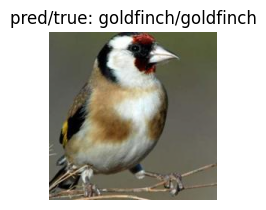

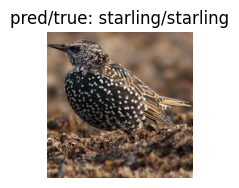

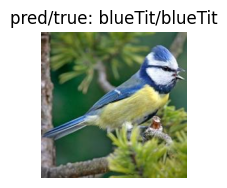

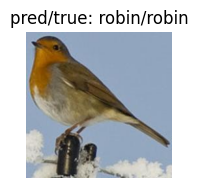

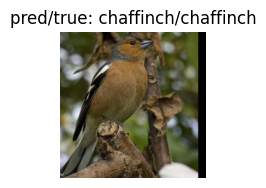

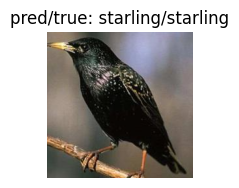

In [18]:
visualize_model(model_aug2, dataloader_tiny_val, class_labels, device)

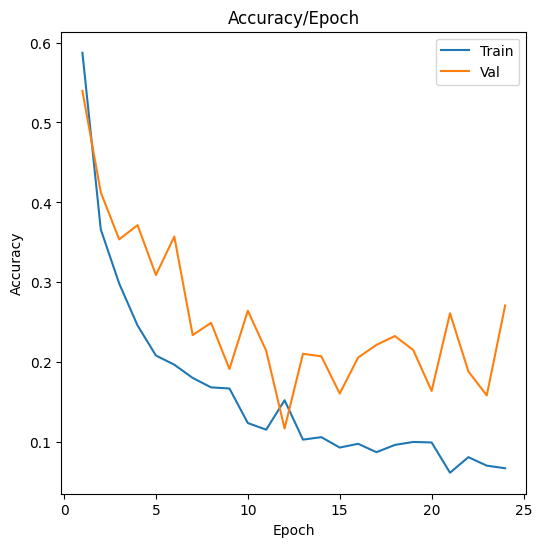

In [19]:
plot_accuracies(model_aug2_info["train_loss"], model_aug2_info["val_loss"], ["Train", "Val"])

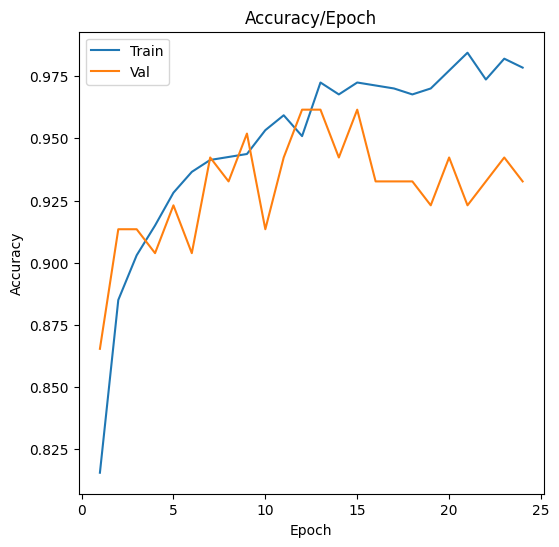

In [20]:
plot_accuracies(model_aug2_info["train_acc"], model_aug2_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 13  0  0  0  2]
 [ 0  1  0 14  0  0  0]
 [ 0  0  1  0 14  0  0]
 [ 0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 95.23809523809523


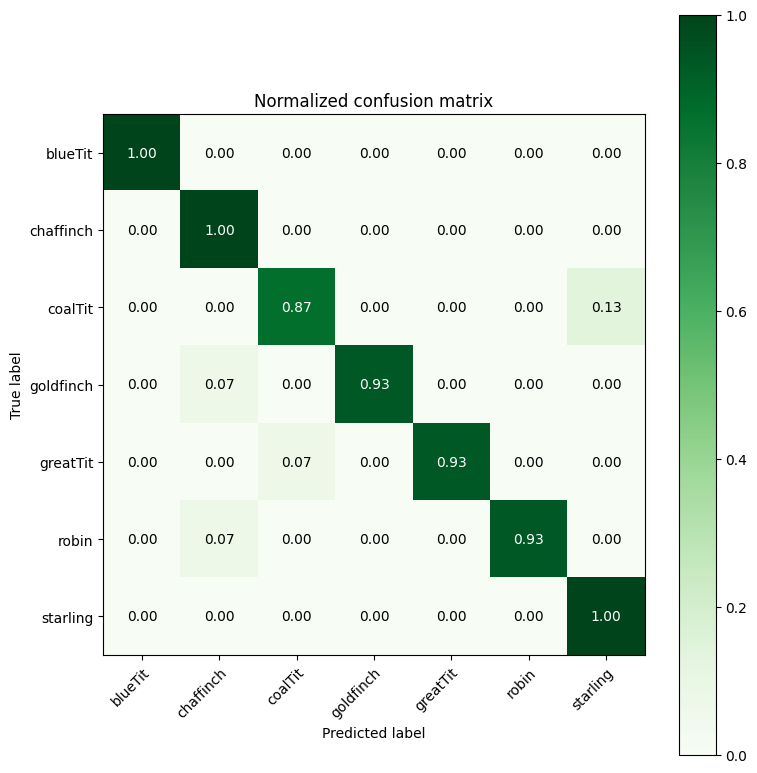

In [21]:
truel, predl = makeAll(dataloader_test, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [22]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       0.88      1.00      0.94        15
     coalTit       0.93      0.87      0.90        15
   goldfinch       1.00      0.93      0.97        15
    greatTit       1.00      0.93      0.97        15
       robin       1.00      0.93      0.97        15
    starling       0.88      1.00      0.94        15

    accuracy                           0.95       105
   macro avg       0.96      0.95      0.95       105
weighted avg       0.96      0.95      0.95       105



### On feeder

[[ 661    0   51    0  388    1  977]
 [  35 1443  102   45  122   45 1760]
 [   0    0  703    2   46    0 1095]
 [   2   31   60 1821    7    0   79]
 [  63    0  242    5 1157    0  566]
 [   0  242    1   41    1   61 1082]
 [   0    0    1    0   30    0 2111]]
Accuracy 52.76875124345116


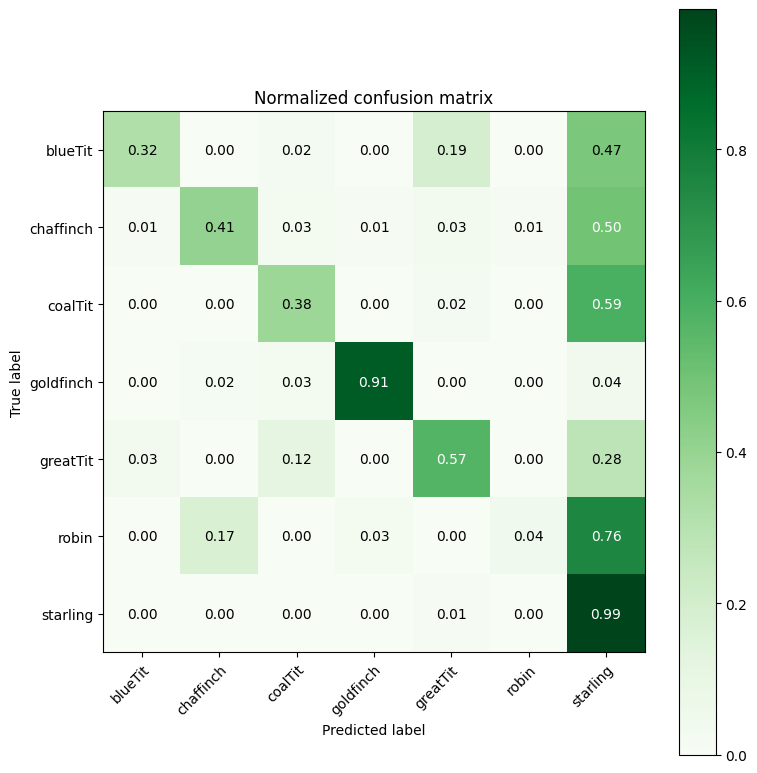

In [23]:
truel, predl = makeAll(dataloader_feeder, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

## Augmentation round 3

Try without jitter

In [24]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation3 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug3 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation3)
dataloader_train_aug3 = torch.utils.data.DataLoader(dataset_train_aug3, batch_size=8, shuffle=True, num_workers=4)

Load in a fresh ResNet50 that's prepped for transfer learning

In [25]:
# load "clean" resnet50
untrained_model_aug3 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug3) 

### Training
First with the frozen layers, then unfreeze for finetuning

In [26]:
freezetrained_model_aug3, _ = train_model(model=untrained_model_aug3, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug3) 

Epoch 1/24
----------
Train Loss: 1.8414 Acc: 0.3210
Val Loss: 1.7968 Acc: 0.4038
Epoch time 1m 10s
----------

Epoch 2/24
----------
Train Loss: 1.5752 Acc: 0.5844
Val Loss: 1.6859 Acc: 0.5096
Epoch time 1m 10s
----------

Epoch 3/24
----------
Train Loss: 1.4057 Acc: 0.6455
Val Loss: 1.5256 Acc: 0.6058
Epoch time 1m 10s
----------

Epoch 4/24
----------
Train Loss: 1.2815 Acc: 0.6743
Val Loss: 1.5208 Acc: 0.5673
Epoch time 1m 10s
----------

Epoch 5/24
----------
Train Loss: 1.1604 Acc: 0.7377
Val Loss: 1.3948 Acc: 0.6346
Epoch time 1m 10s
----------

Epoch 6/24
----------
Train Loss: 1.1117 Acc: 0.7329
Val Loss: 1.3708 Acc: 0.6827
Epoch time 1m 10s
----------

Epoch 7/24
----------
Train Loss: 1.0101 Acc: 0.7533
Val Loss: 1.3913 Acc: 0.5865
Epoch time 1m 10s
----------

Epoch 8/24
----------
Train Loss: 1.0058 Acc: 0.7533
Val Loss: 1.2759 Acc: 0.6731
Epoch time 1m 10s
----------

Epoch 9/24
----------
Train Loss: 0.9355 Acc: 0.7629
Val Loss: 1.2643 Acc: 0.6827
Epoch time 1m 10s
----

In [27]:
unfreeze_layers(freezetrained_model_aug3)
model_aug3, model_aug3_info = train_model(model=freezetrained_model_aug3, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug3)

Epoch 1/24
----------
Train Loss: 0.5398 Acc: 0.8299
Val Loss: 0.4946 Acc: 0.8750
Epoch time 1m 51s
----------

Epoch 2/24
----------
Train Loss: 0.3700 Acc: 0.8802
Val Loss: 0.3504 Acc: 0.8750
Epoch time 1m 52s
----------

Epoch 3/24
----------
Train Loss: 0.2922 Acc: 0.9042
Val Loss: 0.3618 Acc: 0.8942
Epoch time 1m 52s
----------

Epoch 4/24
----------
Train Loss: 0.2505 Acc: 0.9246
Val Loss: 0.3660 Acc: 0.8846
Epoch time 1m 50s
----------

Epoch 5/24
----------
Train Loss: 0.2318 Acc: 0.9281
Val Loss: 0.2846 Acc: 0.9327
Epoch time 1m 51s
----------

Epoch 6/24
----------
Train Loss: 0.2044 Acc: 0.9257
Val Loss: 0.1987 Acc: 0.9615
Epoch time 1m 51s
----------

Epoch 7/24
----------
Train Loss: 0.1639 Acc: 0.9437
Val Loss: 0.2202 Acc: 0.9519
Epoch time 1m 51s
----------

Epoch 8/24
----------
Train Loss: 0.1191 Acc: 0.9641
Val Loss: 0.2480 Acc: 0.9423
Epoch time 1m 51s
----------

Epoch 9/24
----------
Train Loss: 0.1724 Acc: 0.9473
Val Loss: 0.2478 Acc: 0.9231
Epoch time 1m 51s
----

### Round 3 Results

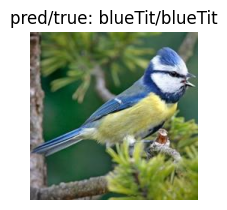

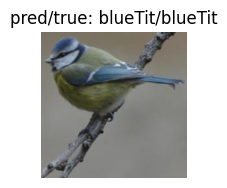

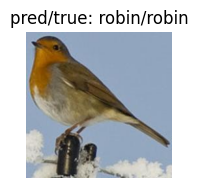

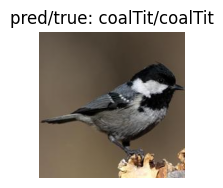

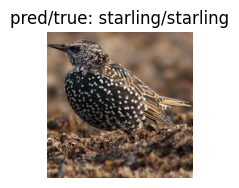

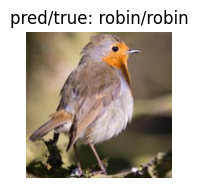

In [28]:
visualize_model(model_aug3, dataloader_tiny_val, class_labels, device)

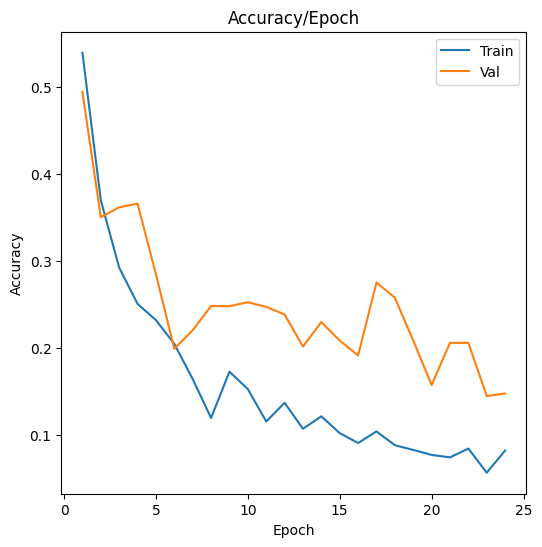

In [29]:
plot_accuracies(model_aug3_info["train_loss"], model_aug3_info["val_loss"], ["Train", "Val"])

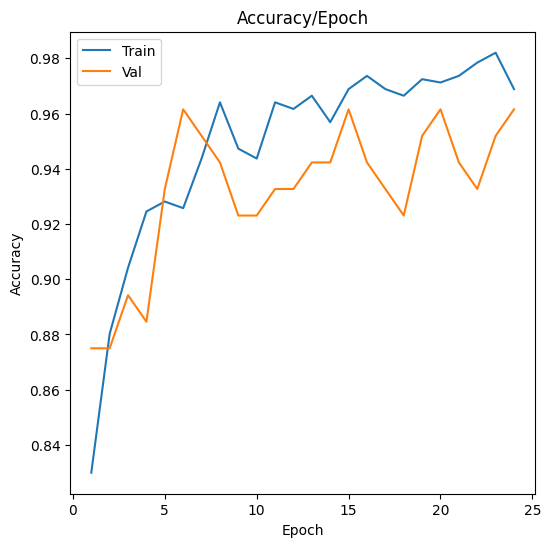

In [30]:
plot_accuracies(model_aug3_info["train_acc"], model_aug3_info["val_acc"], ["Train", "Val"])

[[14  1  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  1 13  0  1  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  3  0 12  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 94.28571428571428


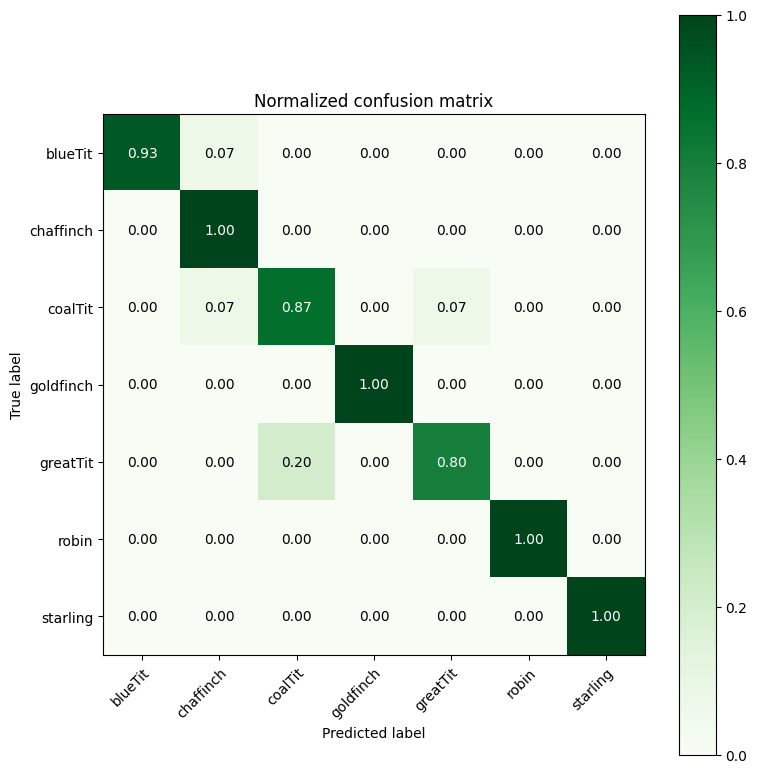

In [31]:
truel, predl = makeAll(dataloader_test, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [32]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      0.93      0.97        15
   chaffinch       0.88      1.00      0.94        15
     coalTit       0.81      0.87      0.84        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       0.92      0.80      0.86        15
       robin       1.00      1.00      1.00        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.94       105
   macro avg       0.95      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



### On Feeder

[[ 196    5   72   59  386    0 1360]
 [   3 1366  103  109   26   44 1901]
 [   0    0  602   10   14    0 1220]
 [   0    6   55 1840   11    2   86]
 [   4    2  299   14  957    0  757]
 [   0  263    0   11    0  163  991]
 [   0    0    0    0    1    0 2141]]
Accuracy 48.17958750580277


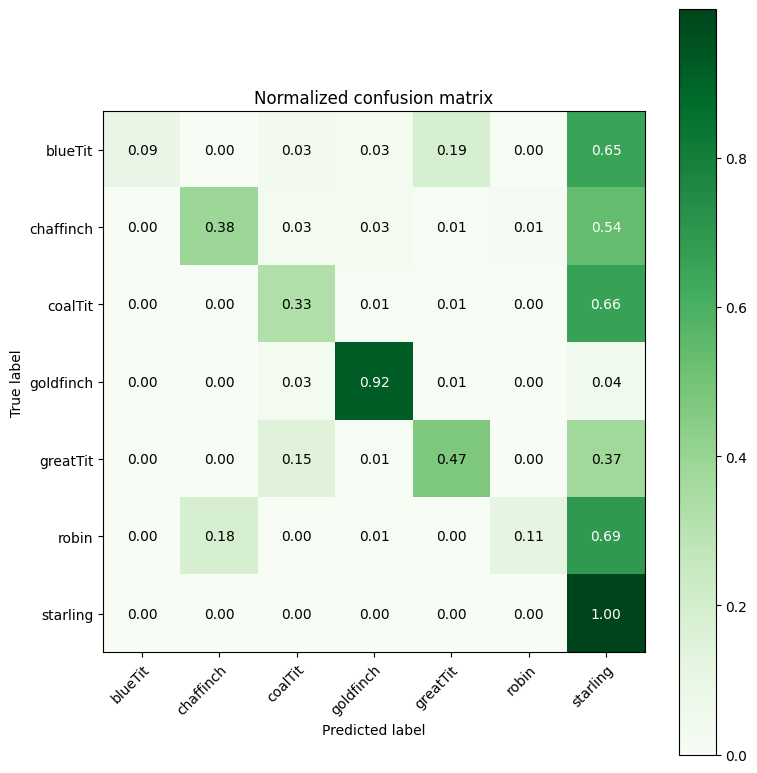

In [33]:
truel, predl = makeAll(dataloader_feeder, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))